<a href="https://colab.research.google.com/github/pikey-msc/PythonBasico/blob/master/Indexacion_elegante_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indexación

En los modulos anteriores vimos cómo acceder y modificar porciones de matrices o índices simples (``arr[0]``), slices (ej. ``arr[:5]``), y mascaras booleanas (ej. ``arr[arr > 0]``).
En est módulo veremos otro estilo de indexarlos conocido como Fancy Indexing (indexación elegante) es similar a la indexación simple, pero pasamos matrices de índices en lugar de escalares, permitiendonos acceder y modificar muy rápidamente subconjuntos complicados de los valores de una matriz.

## Explorando la indexación elegante

Significa pasar una matriz de índices para acceder a varios elementos de la matriz a la vez. Por ejemplo, consideremos la siguiente matriz.

In [ ]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

hola RandomState(MT19937)
[51 92 14 71 60 20 82 86 74 74]


Supongamos que queremos acceder a tres de elementos diferentes. Podríamos hacerlo así:

In [ ]:
[x[3], x[7], x[2]]

[71, 86, 14]

Otra alternativa, podríamos pasar una sola lista o cadena de indices obtenidas tambien como resultado.

In [ ]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Cuando se usa la indexación elegante, el resultado se refleja en forma de matrices de las matrices de índice en lugar de la forma de la matriz que se indexa, por ejemplo:

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

De igual manera funciona para múltiples dimensiones.
Considere la siguiente matriz:

In [ ]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Al igual que con la indexación simple, el primer índice se refiere a la fila, y el segundo a la columna:

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Observemos que el primer resultado ``X[0, 2]``, el segundo es ``X[1, 1]``, y el tercero es ``X[2, 3]``.

Entonces, por ejemplo, si nosotros combinamos un vector columna y una vector de fila dentro de los índices, obtendremos un resultado bidemensional.

In [ ]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Aquí, cada valor de la fila se une con cada vector columna, exactamente commo vimos en las operaciones aritméticas.
Por ejemplo:

In [ ]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

Siempre es importante recordad que la salida de indexación elegante regleja la forma transmitida de los índices, en lugar de la forma de la matriz que se indexa.

## Indexación combinada

Para mejorar aún más las operaciones, Estos tipos de indexaciones se pueden combinar.

In [ ]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Podemos combinar índices elegantes y simples.

In [ ]:
X[2, [2, 0, 1]]

array([10,  8,  9])

También podemos combinar índice elegante con slices.

In [ ]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

Y podemos combinarla con masking (enmascaramiento).

In [ ]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Todas estas opciones de indexación combinadas conducen a un conjunto flexible de operaciones para acceder y modificar valores de una matriz.

## Example: Seleccionar puntos aleatorios

Un uso comun de la indexación elegante es la selección de subconjuntos de filas de una matriz.
Por ejeplo, podríamos tener un $N$ por $M$ representando una matriz de $N$ puntos en $M$ dimensiones, como los siguientes puntos extraidos de una distribución normal bidimensional

In [ ]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Usando las herramientras de matplotlib podemos visualizar estos puntos como un diagrama de dispersión:

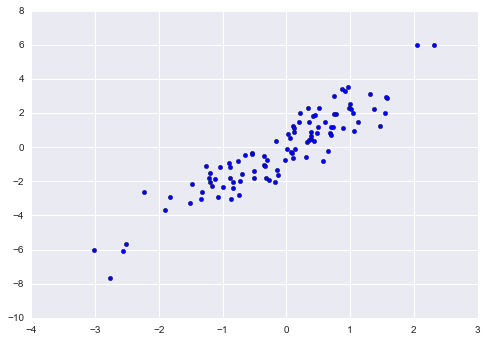

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # Estilos de gráfico

plt.scatter(X[:, 0], X[:, 1]);

Usemos una indexación elegante para seleccionar 20 puntos aleatorios Lo haremos primero seleccionando 20 índices aleatorios sin repeticiones, y usando esos indices para seleccionar na parte de la matriz original:

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([93, 45, 73, 81, 50, 10, 98, 94,  4, 64, 65, 89, 47, 84, 82, 80, 25,
       90, 63, 20])

In [ ]:
selection = X[indices]  # Indexación elegante
selection.shape

(20, 2)

Ahora, para ver que los puntos se seleccionaron, vamos a trazar circulos grandes en los puntos seleccionados:

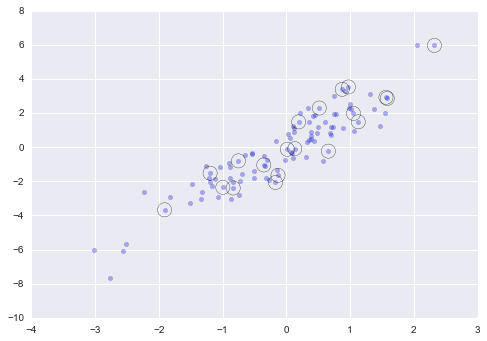

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

Este tipo de estrategia se usa a menudo para dividir rápidamente conjuntos de datos, como a menudo se necesita en los conjutos de entrenamiento o prueba para la validación de modelos estadísticos y en enfoques de muestreo para responder preguntas estadísticas.

## Modificar valores con Indexación elegante

ASí como la indexación elegante puede ser usada para acceder a partes de una matriz, esto también puede usarse para modificar partes de una cadena.

Por ejemplo, imagina que tenemos una cadena de índices y nos gustaría establecer los elementos en una matriz de algún valor:

In [ ]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


Podemos usar cualquier tipo de asignación de operador para esto. Por ejemplo:

In [ ]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Sin embargo, tengamos en cuenta que los índices repetidos con estas operaciones pueden provocar algunos resultados inesperados, consideremos lo siguiente:

In [ ]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


¿A donde se fue el 4? El resulado de esta operación es primero asignar``x[0] = 4``, seguido por ``x[0] = 6``.
El resulatdo, es dado que ``x[0]`` contiene el valor 6.

Consideremos esta operación:

In [ ]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

Podrías esperar que ``x[3]`` podría contener el valor de 2, y ``x[4]`` podría contener el valor de 3, ya que esta es la cantidad de veces que el índice se repite. ¿Por qué este no es el caso?
Conceptualmente, esto es porque ``x[i] += 1``  se entiende como una abreviatura de ``x[i] = x[i] + 1``. ``x[i] + 1`` se evalúa, y luego el resultado se asigna a los índices de x.
Con esto en cuenta, no es el aumento lo que ocurre varias veces, sino la asignación lo que conduce a los resultados poco intuitivos.

Entonces, ¿Qué pasa si se quiere otro comportamiento donde se repite la operación? Para esto, puedes utilizar el ``at()`` metodo de ufuncs (disponible desde NumPy 1.8), y hace lo siguiente:

In [ ]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


El ``at()``  método realiza una aplicación que obtiene un operador especificando indices (aquí, ``i``) con valores especificados (aquí, 1).
Otro método que es similar es el ``reduceat()`` método de ufuncs, el cual puede leer en la documentación de NumPy.

## Ejemplo: Binning de datos

Puedes usar estas ideas para agrupar datos de manera eficiente para crear un histrograma a mano. Por ejemplo, imagina que tenemos 1,000 datos y nos gustaría encontrar rápidamente onde se encuentran dentro de una matriz de contenedores. Podríamos calcularlo usando ``ufunc.at`` así:

In [ ]:
np.random.seed(42)
x = np.random.randn(100)

# Calcular un histograma a mano
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# Encontrar el contenedor apropiado para cada x
i = np.searchsorted(bins, x)

# Agramos 1 a cada uno de los contenedores 
np.add.at(counts, i, 1)

Los recuentos ahora reflejan el número de puntos dentro de cada contenedor, en es decir, un histograma:

In [ ]:
# Diagrama de los resultados
plt.plot(bins, counts, linestyle='steps');

NameError: ignored

Por supuesto, sería muy burdo tener que hacer esto en cada ocación. Por lo que Matplotlib porporciona la función ``plt.hist()`` la cual hace lo mismo en una sola linea.

```python
plt.hist(x, bins, histtype='step');
```

Esta función creará un gráfico casi identico a el que se ve aquí.
Para calcular el inicio, ``matplotlib`` usa la función ``np.histogram``, la cual hace calculos muy similares a los que hicimos anteriormente. Comparemos los 2 resultados:

In [ ]:
print("Rutina NumPy:")
%timeit counts, edges = np.histogram(x, bins)

print("Rutina personalizada:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Nuestro algoritmo de una linea es más rapido que el algoritmo optimizado de numpy. ¿Como puede hacer esto?
Si se profundiza en el código fuente de ``np.histogram`` (puedes ver esto en  IPython escribiendo ``np.histogram??``), tu verás que esto es más complicado que la busqueda simple y conteo anteriormente creado; esto porque el algoritmo de NumPy es más flexible, y particularmente esta designado para un mejor rendimiento cuando la cantidad de puntos aumenta:

In [ ]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Esta compración muestra que la eficiencia del algoritmo casi nunca es una pregunta sencilla. Un algoritmo eficiente para grandes conjuntos de datos no siempre será le mejor opción para un conjunto de datos pequeño y viceversa, pero la ventaj de codificar usted mismo el algoritmo es que con una comprensión de estos métodos básicos, podría usar esto para la construcción de mejores modelos y obtener comportamientos personalizados interesantes.

La clave para usar Python de manera eficiente en aplicaciones en conjuntos de datos intensivos es conocer las rutinas generales de convenviencia y cuando son apropiadas como ``np.histogram``, pero también saber como hacer uso a un nivel inferior de funcionalidad cuando se necesita un comportamiento más puntual.